### Loss Functions in Machine Learning Optimization

---

## 1. What is a Loss Function?
A **loss function** quantifies the difference between the predicted output of a model and the actual target value.

- It drives the training process.
- Goal: Minimize the loss to improve the model.

---

## 2. Mean Squared Error (MSE)

### 🔢 Formula:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

### 💡 Use Case:
- Regression tasks

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Example
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

mse = np.mean((y_true - y_pred)**2)
print("MSE:", mse)

MSE: 0.375


In [13]:
sns.set(style="whitegrid")

# Create synthetic data for regression and classification examples
np.random.seed(42)
X = np.linspace(0, 2, 50)
y_reg = 3 * X + np.random.randn(50) * 0.5  # Linear regression target
y_clf = (X > 1).astype(int)  # Binary classification target

X = X.reshape(-1, 1)  # Reshape for matrix operations

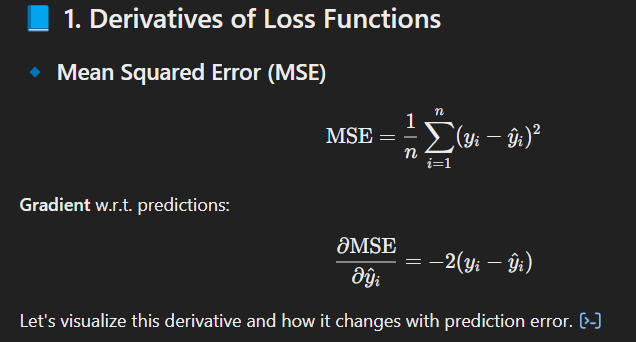

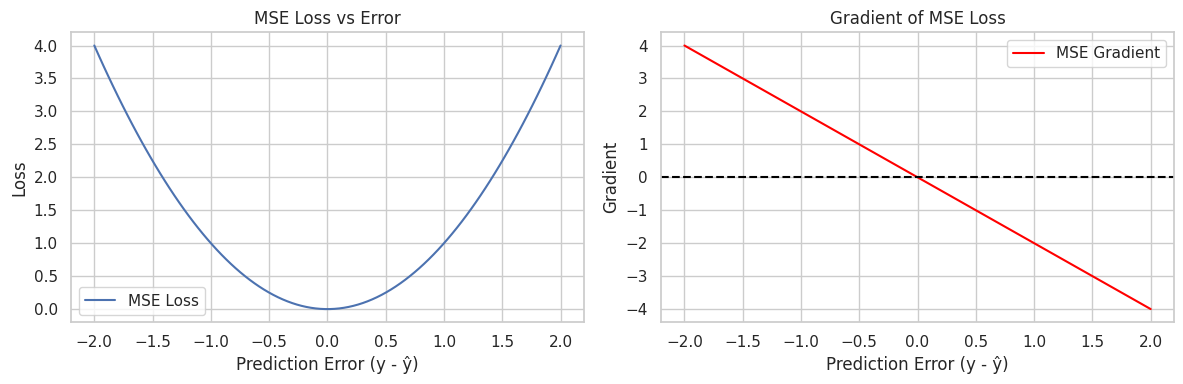

In [14]:
# Visualizing MSE loss and its derivative
errors = np.linspace(-2, 2, 100)
mse_loss = errors**2
mse_grad = -2 * errors

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(errors, mse_loss, label='MSE Loss')
plt.title("MSE Loss vs Error")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors, mse_grad, color='red', label='MSE Gradient')
plt.title("Gradient of MSE Loss")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Gradient")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


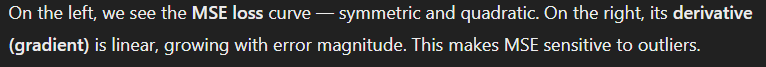

## 3. Mean Absolute Error (MAE)

### 🔢 Formula:
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

### 💡 Use Case:
- Regression, robust to outliers

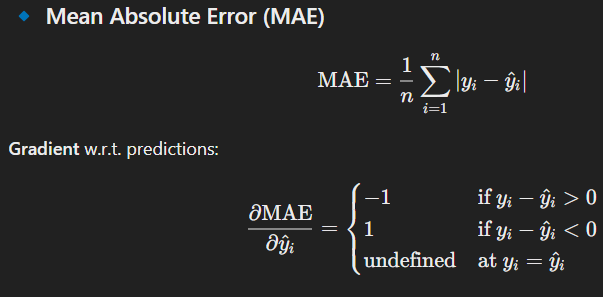

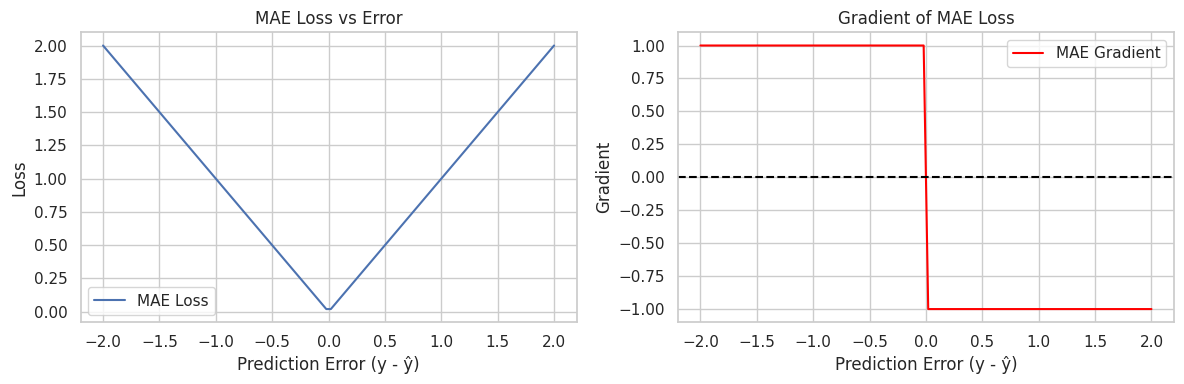

In [15]:
# Visualizing MAE loss and its derivative
mae_loss = np.abs(errors)
mae_grad = np.sign(-errors)  # Gradient is -1 for positive errors, 1 for negative

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(errors, mae_loss, label='MAE Loss')
plt.title("MAE Loss vs Error")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors, mae_grad, color='red', label='MAE Gradient')
plt.title("Gradient of MAE Loss")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Gradient")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

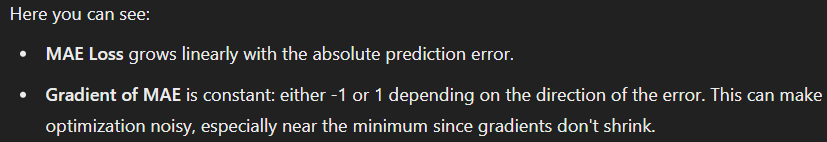

In [3]:
mae = np.mean(np.abs(y_true - y_pred))
print("MAE:", mae)

MAE: 0.5


## 4. Huber Loss

### 🔢 Formula:
Mix of MAE and MSE. Less sensitive to outliers.

$$
L_\delta(a) = \begin{cases}
  \frac{1}{2}a^2 & \text{for } |a| \leq \delta \\
  \delta (|a| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases}
$$

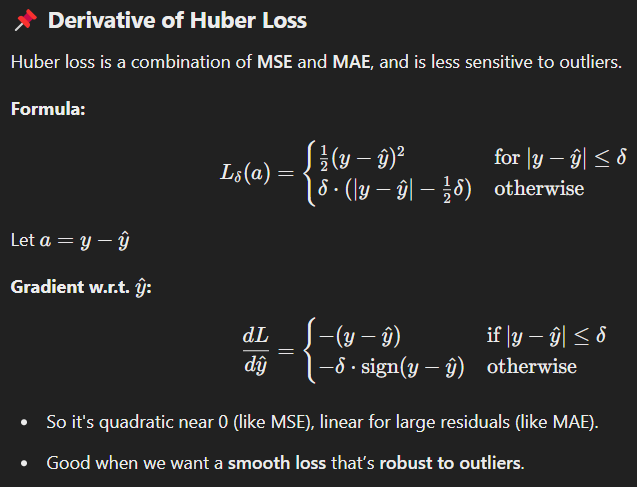

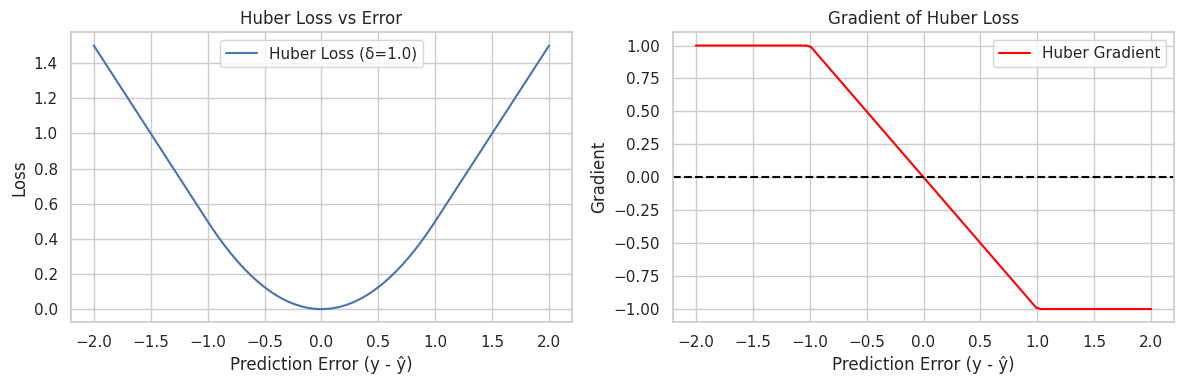

In [16]:
# Define Huber loss and gradient
delta = 1.0

huber_loss = np.where(np.abs(errors) <= delta,
                      0.5 * errors**2,
                      delta * (np.abs(errors) - 0.5 * delta))

huber_grad = np.where(np.abs(errors) <= delta,
                      -errors,
                      -delta * np.sign(errors))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(errors, huber_loss, label=f'Huber Loss (δ={delta})')
plt.title("Huber Loss vs Error")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(errors, huber_grad, color='red', label='Huber Gradient')
plt.title("Gradient of Huber Loss")
plt.xlabel("Prediction Error (y - ŷ)")
plt.ylabel("Gradient")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

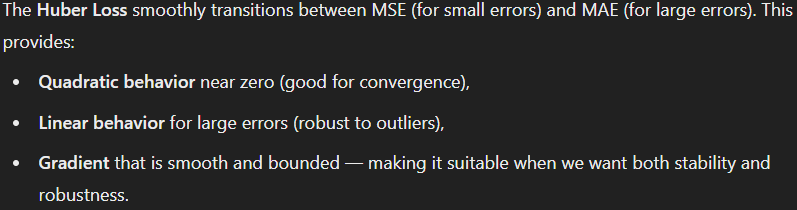

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import HuberRegressor

# Fit Huber model
model = HuberRegressor().fit(y_true.reshape(-1, 1), y_pred)

## 5. Binary Cross Entropy (Log Loss)

### 🔢 Formula:
$$ L = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

### 💡 Use Case:
- Binary classification

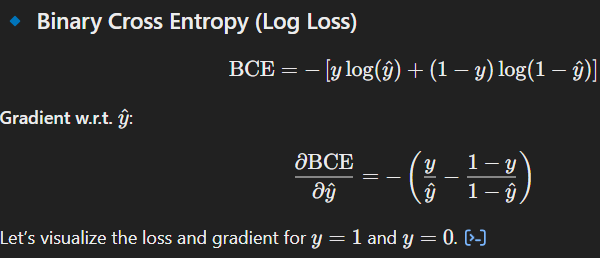

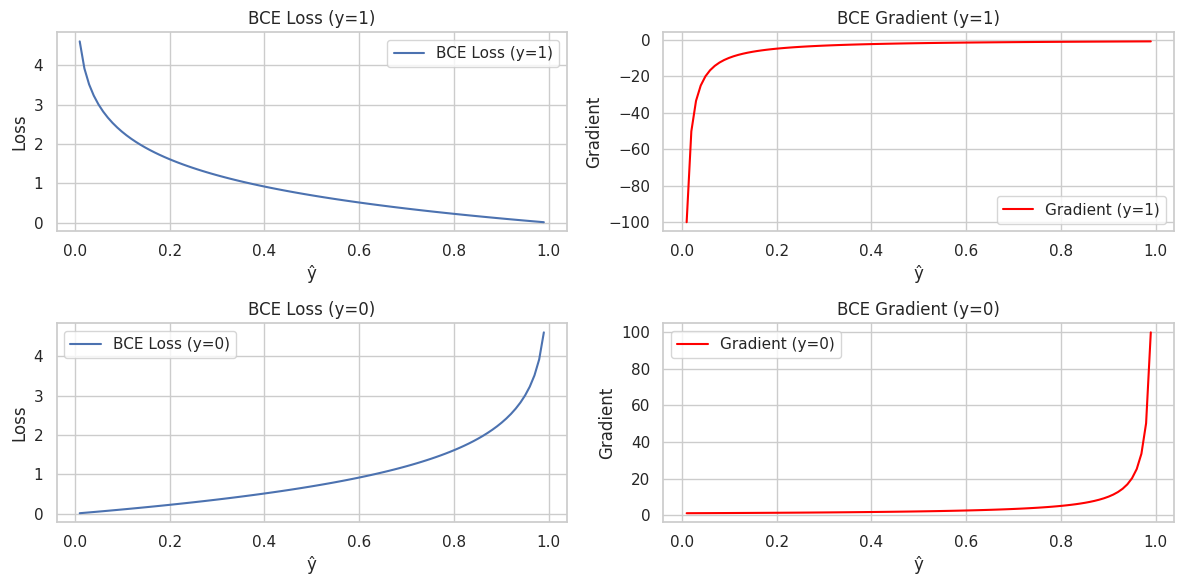

In [17]:
# Probability predictions (0 to 1)
y_hat = np.linspace(0.01, 0.99, 100)  # avoid log(0)

# BCE loss and gradient for y = 1 and y = 0
bce_loss_y1 = -np.log(y_hat)
bce_grad_y1 = -1 / y_hat

bce_loss_y0 = -np.log(1 - y_hat)
bce_grad_y0 = 1 / (1 - y_hat)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(y_hat, bce_loss_y1, label='BCE Loss (y=1)')
plt.title("BCE Loss (y=1)")
plt.xlabel("ŷ")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(y_hat, bce_grad_y1, color='red', label='Gradient (y=1)')
plt.title("BCE Gradient (y=1)")
plt.xlabel("ŷ")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(y_hat, bce_loss_y0, label='BCE Loss (y=0)')
plt.title("BCE Loss (y=0)")
plt.xlabel("ŷ")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(y_hat, bce_grad_y0, color='red', label='Gradient (y=0)')
plt.title("BCE Gradient (y=0)")
plt.xlabel("ŷ")
plt.ylabel("Gradient")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

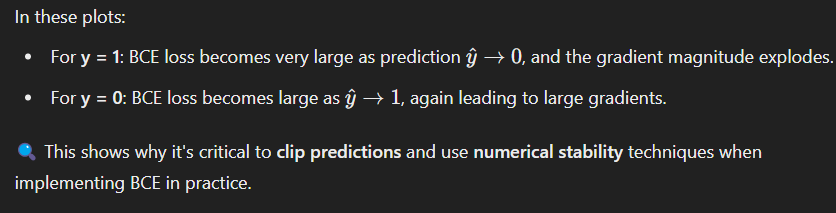

In [8]:
from sklearn.metrics import log_loss

def binary_cross_entropy(y_true, y_pred):
    N = len(y_true)
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / N
    return loss

# Your example
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.1, 0.8, 0.7])

print("Manual BCE:", binary_cross_entropy(y_true, y_pred))  # Output: 0.1977

bce = log_loss(y_true, y_pred)
print("Binary Cross Entropy SKlearn:", bce)

Manual BCE: 0.19763488164214868
Binary Cross Entropy SKlearn: 0.19763488164214868


## 6. Categorical Cross Entropy

### 💡 Use Case:
- Multi-class classification with softmax outputs

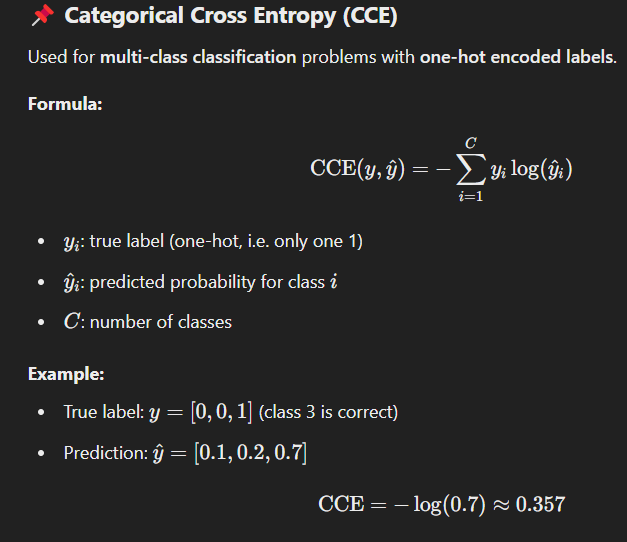

In [9]:
y_true_multi = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
y_pred_multi = [[0.9, 0.05, 0.05], [0.1, 0.8, 0.1], [0.05, 0.05, 0.9]]

cce = log_loss(y_true_multi, y_pred_multi)
print("Categorical Cross Entropy:", cce)

Categorical Cross Entropy: 0.14462152754328741


## 7. Visual Comparison of Loss Functions

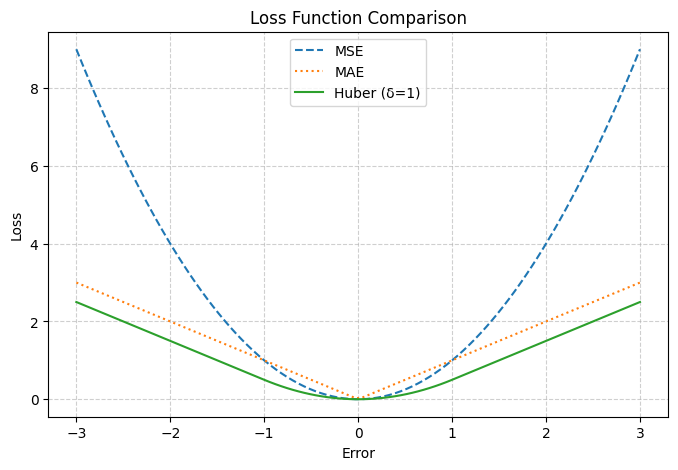

In [10]:
errors = np.linspace(-3, 3, 100)
mse_loss = errors**2
mae_loss = np.abs(errors)
huber_loss = np.where(np.abs(errors) <= 1, 0.5 * errors**2, 1 * (np.abs(errors) - 0.5))

plt.figure(figsize=(8, 5))
plt.plot(errors, mse_loss, label='MSE', linestyle='--')
plt.plot(errors, mae_loss, label='MAE', linestyle=':')
plt.plot(errors, huber_loss, label='Huber (δ=1)', linestyle='-')
plt.title("Loss Function Comparison")
plt.xlabel("Error")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## ✨ Summary Table
| Loss Function | Use Case | Robust to Outliers? |
|---------------|----------|----------------------|
| MSE           | Regression | ❌ |
| MAE           | Regression | ✅ |
| Huber         | Regression | ✅ |
| Binary Cross Entropy | Binary Classification | ❌ |
| Categorical Cross Entropy | Multi-Class Classification | ❌ |
